In [347]:
def get_polysFromLayers_mod(elevation,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[]
    indeces=[]
    fyi=np.flipud(yi)
    fxi=np.flipud(xi)
    for xyind in xycoords[:,:]:
#         print(j,end=',')
        indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
        indeces.append([indx,indy])
        depth_on_cl.append(elevation[indy,indx][0])
    depth_on_cl=np.array([depth_on_cl])
#     print(depth_on_cl)
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        for xyind in indeces:
    #         print(j,end=',')
#             indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
            thk_on_cl.append(layers[i][xyind[1],xyind[0]][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)

    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(xycoords.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(xycoords.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))    
    return polygons,depth_on_cl
def crook_triangle(loc,dist=0.005):
    return [[loc[0]-dist,loc[1]-dist],
     [loc[0]+dist,loc[1]-dist],
     [loc[0]+dist,loc[1]],
     [loc[0]-dist,loc[1]-dist],
    ]
def gety(x,points):
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords)[0]
#     print("Line Solution is y = {m}x + {c}".format(m=m,c=c))
    return m*x+c
def get_indx_of_croockedline(coords,crooked_line):
    myKDTree = spatial.KDTree(coords)
    final_x=[]
    final_y=[]
    for i in range(1,len(crooked_line)):
        point_pair=np.array([crooked_line[i],crooked_line[i-1]])
        print('point_pair: ',point_pair[:,0])

    #     
        sel_xi=xi[xi>=min(point_pair[:,0]) ]
        sel_xi=sel_xi[sel_xi<=max(point_pair[:,0])+sel_xi[1]-sel_xi[0]]
    #     break
        final_x.extend(sel_xi)
        final_y.extend(gety(sel_xi,point_pair))


    #get close_y index
    IND=[]
    for pt in zip(final_x,final_y):
        distance,index=myKDTree.query(pt)
        IND.append(index)
    return IND
def get_indx_of_croockedline_mod(coords,crooked_line):
    myKDTree = spatial.KDTree(coords)
    final_x=[]
    final_y=[]
    IND=[]
    for i in range(1,len(crooked_line)):
        point_pair=np.array([crooked_line[i],crooked_line[i-1]])
#         print('point_pair: ',point_pair[:,0])

    #     
        sel_xi=xi[xi>=min(point_pair[:,0]) ]
        sel_xi=sel_xi[sel_xi<=max(point_pair[:,0])+sel_xi[1]-sel_xi[0]]
    #     break
        final_x.extend(sel_xi)
        sel_yi=gety(sel_xi,point_pair)
        final_y.extend(sel_yi)
        [sel_xi[0],sel_xi[-1]]
        _,index0=myKDTree.query((sel_xi[0],sel_yi[0]))
        _,index1=myKDTree.query((sel_xi[-1],sel_yi[-1]))
#         interval=int(round((index1-index0)/(len(sel_xi)-1)))
#         ind=list(range(index0,index1+1,interval))
        ind=np.int32(np.linspace(index0, index1, len(sel_xi), endpoint=True))
#         diff=index1-ind[-1]
        
#         corr_fact=diff/len(sel_xi)
#         corr_vect=np.round(np.arange(len(sel_xi))*corr_fact)
#         print('diff :{} , corr.fact: {}'.format(diff,corr_fact))
#         print(corr_vect)
        IND.extend(ind)
#         IND.extend()


    #get close_y index
    
#     for pt in zip(final_x,final_y):
#         distance,index=myKDTree.query(pt)
#         IND.append(index)
    return IND
def design_crooked_section(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
        loc_coords.append(vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values.astype(float))
  
    return np.array(loc_coords).ravel().reshape(len(loc_array),2)
def design_crooked_section_w_ele(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
        loc_coords.append(vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing','RL']].values.astype(float))
  
    return np.array(loc_coords).ravel().reshape(len(loc_array),3)
def get_sections():
    profiles=load_pkl(base_folder+'profiles.pkl')
    sections=[]
    for profile in profiles:
        sections.append([p[0] for p in profile])
    return sections   

In [348]:
# polysets
# for total_section,section,image_name in zip(polysets[n:n+1],sections[n:n+1],sec_image_names[n:n+1]):
#     crooked_line=design_crooked_section_w_ele(section,vesdf)
#     print(crooked_line)
# index1=200
# index0=0
# interval=int((index1-index0)/(6-1))
# list(range(index0,index1+1,interval))
# l=30
# diff=-5
# corr_fact=diff/l
# myvect=list(range(30))
# corr_vect=np.arange(30)*corr_fact
# myvect+np.int32(corr_vect)

np.arange(10,20,2)

N=500
x1 = np.int32(np.linspace(0, 100, N, endpoint=True))
x1

array([  0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   2,   2,   2,
         2,   2,   3,   3,   3,   3,   3,   4,   4,   4,   4,   4,   5,
         5,   5,   5,   5,   6,   6,   6,   6,   6,   7,   7,   7,   7,
         7,   8,   8,   8,   8,   8,   9,   9,   9,   9,   9,  10,  10,
        10,  10,  10,  11,  11,  11,  11,  11,  12,  12,  12,  12,  12,
        13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  15,  15,  15,
        15,  15,  16,  16,  16,  16,  16,  17,  17,  17,  17,  17,  18,
        18,  18,  18,  18,  19,  19,  19,  19,  19,  20,  20,  20,  20,
        20,  21,  21,  21,  21,  21,  22,  22,  22,  22,  22,  23,  23,
        23,  23,  23,  24,  24,  24,  24,  24,  25,  25,  25,  25,  25,
        26,  26,  26,  26,  26,  27,  27,  27,  27,  27,  28,  28,  28,
        28,  28,  29,  29,  29,  29,  29,  30,  30,  30,  30,  30,  31,
        31,  31,  31,  31,  32,  32,  32,  32,  32,  33,  33,  33,  33,
        33,  34,  34,  34,  34,  34,  35,  35,  35,  35,  35,  3

['119', '128', '114', '124'] A-A
Crook part:  [[ 79.80932  25.40122]
 [ 79.8442   25.45128]]
Crook part:  [[ 79.8442   25.45128]
 [ 79.85957  25.48371]]
Crook part:  [[ 79.85957  25.48371]
 [ 79.88867  25.53184]]
['150', '160', '152', '158', '172', '170', '157'] B-B
Crook part:  [[ 79.71526  25.1458 ]
 [ 79.73988  25.1923 ]]
Crook part:  [[ 79.73988  25.1923 ]
 [ 79.80843  25.27861]]
Crook part:  [[ 79.80843  25.27861]
 [ 79.87275  25.35814]]
Crook part:  [[ 79.87275  25.35814]
 [ 79.94946  25.42425]]
Crook part:  [[ 79.94946  25.42425]
 [ 79.97585  25.45289]]
Crook part:  [[ 79.97585  25.45289]
 [ 80.00813  25.47435]]


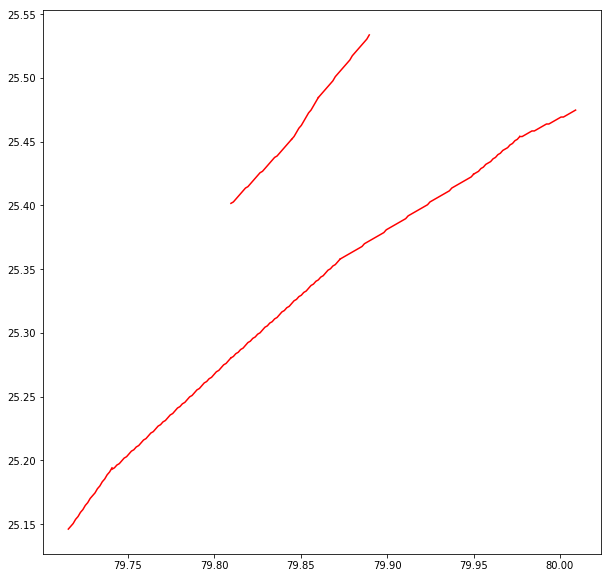

In [349]:
# Modules and data loading


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors
from matplotlib.collections import PatchCollection
from matplotlib.patches import  Polygon
from mpl_toolkits.basemap import Basemap as Basemap

import sys
sys.path.append('..')
from pickle_fns import *
import math
from scipy.interpolate import griddata,interp2d
from scipy import spatial
from numpy import ones,vstack
from numpy.linalg import lstsq
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'

# vesdf,data_dfs=load_pkl('tikamgarh.pkl')
vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
E,N,Ele=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float),vesdf.RL.values.astype(np.float)



# ulablesfile='tikamgarh_thck_labels.npy'
# layers_outfile='tikamgarh_layers.npz'
# elev_file='tikamgarh_ele.npy'

layers_outfile=base_folder+'layers_w_ele.npz'
# npzfile=np.load(layers_outfile)
# unique_lbls,lith_dict,xio,yio,layerso=npzfile['arr_0'],npzfile['arr_1'],npzfile['arr_2'],npzfile['arr_3'],npzfile['arr_4']
# # np.save('tikamgarh_ele.npy',layers[0])

npzfile=np.load(layers_outfile)
unique_lbls,lith_dict,xi,yi,layers=npzfile['arr_0'],npzfile['arr_1'],npzfile['arr_2'],npzfile['arr_3'],npzfile['arr_4']
elevation=np.load(elev_file)
color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600','agranite':'#AF99Cd','final_granite':'#B006A0'}
facies_colors=[color_def[l] for l in color_def]

allLoc_numbers=vesdf['VES No.'].values.astype(np.int)
elevations=vesdf['RL'].values.astype(np.int)

# sections=[
#     [658,664,657,660,659],[673,669,666],[674,671,665,670],[673,674,672],
#     [668,664,663],[669,667,661,659],[663,657,662,667,670]
# ]
sections=get_sections()
sec_image_names=['A-A','B-B','C-C','D-D','E-E','F-F','G-G','h-h','i-i','j-j','k-k','l-l','m-m','n-n']




final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
nl,r,c=layers.shape
coords=[]
for i in range(r):
    for j in range(c):
        coords.append([xi[i],yi[j]])
polysets=[]
nsections=2
i=0
f=plt.figure(figsize=(10,10))
for section,sec_name in zip(sections[:nsections],sec_image_names[:nsections]):
#     if i==1:
        print(section,sec_name)
        crooked_line=design_crooked_section(section,vesdf)
#         crooked_line=np.array(crooked_line).ravel().reshape(len(section),2)

    #     basemap_plot(vesdf,crooked_line,sec_name)
        polygons=[]
        for ic in range(1,len(crooked_line)):
            crookpart=np.append([crooked_line[ic-1]],[crooked_line[ic]],axis=0)
            print('Crook part: ',crookpart)
            xycoords=[]
            xycoords1=[]
            sec_logs=[]
            IND=get_indx_of_croockedline_mod(coords,crookpart)
#             IND1=get_indx_of_croockedline_mod(coords,crookpart)
            IND=np.array(IND)
#             IND1=np.array(IND1)
#             print(IND)
#             print(IND1)
            for I in IND:
                xycoords.append(coords[I])
#             for I in IND1:
#                 xycoords1.append(coords[I])
            xycoords=np.array(xycoords)
#             xycoords1=np.array(xycoords1)
            sectionpart,depth_on_cl=get_polysFromLayers_mod(elevation,layers,np.array(xycoords),xi,yi)
            polygons.append(sectionpart)
            
#             plt.plot(xycoords1[:,0],xycoords1[:,1],'b')
            plt.plot(xycoords[:,0],xycoords[:,1],'r')
#             break
        polysets.append(polygons)
       
        i +=1
#         break
np.save('polysets-new.npy',polysets)

In [346]:
# plt.hist(layers[0])
layers[0].shape
# sectionpart,
depth_on_cl
sectionpart

[array([[  79.9767482 ,   25.45396479, -326.37990771],
        [  79.97815309,   25.45396479, -327.23252304],
        [  79.97955798,   25.45505639, -327.17142584],
        [  79.98096287,   25.456148  , -327.11025655],
        [  79.98236776,   25.4572396 , -327.04869076],
        [  79.98377265,   25.4583312 , -326.98629592],
        [  79.98517754,   25.4583312 , -327.75631287],
        [  79.98658242,   25.45942281, -327.70110311],
        [  79.98798731,   25.46051441, -327.64461974],
        [  79.9893922 ,   25.46160601, -327.58723523],
        [  79.99079709,   25.46269762, -327.52986274],
        [  79.99220198,   25.46378922, -327.47246021],
        [  79.99360687,   25.46378922, -328.17308348],
        [  79.99501176,   25.46488082, -328.12279995],
        [  79.99641665,   25.46597242, -328.07200576],
        [  79.99782154,   25.46706403, -328.03334091],
        [  79.99922643,   25.46815563, -328.00229368],
        [  80.00063132,   25.46924723, -327.98242585],
        [ 

In [181]:
# IND=np.array(IND)
# IND[1:]-IND[:-1]
# # len(polysets)
# for poly in polysets:
#     print('***',len(poly))
#     for p in poly:
#         print(len(p))
#         print(p)
#     break

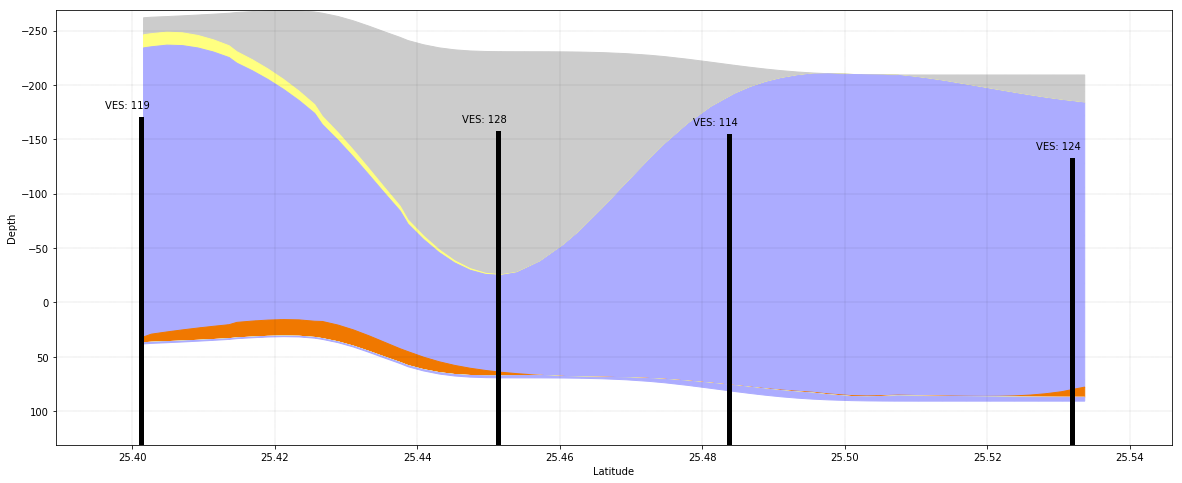

In [178]:
def add_2dpolygons(ax,polysets,normal_proj,correction=0):
    for polygons in polysets:
        for k in range(len(polygons)):
            if len(polygons[k])>0:
                x=np.array(polygons[k][:,0])
                y=np.array(polygons[k][:,1])
                z=np.array(polygons[k][:,2])
                if normal_proj:
                    polygon = Polygon(np.array([x+correction,z]).T, closed=True,color=facies_colors[final_lbls[k]],
                              fill=True, hatch='/')
                else:
                    polygon = Polygon(np.array([y+correction,z]).T, closed=True,color=facies_colors[final_lbls[k]],
                              fill=True, hatch='/')
                patches.append(polygon)
                mycolors.append(facies_colors[final_lbls[k]])
                ax.add_patch(polygon)
                
n=0
normal_proj=False
# normal_proj=True
# patches=[]
for total_section,section,image_name in zip(polysets[n:n+1],sections[n:n+1],sec_image_names[n:n+1]):
    crooked_line=design_crooked_section_w_ele(section,vesdf)
    patches=[]
    mycolors=[]
    f,ax=plt.subplots( figsize=(20, 8))
    add_2dpolygons(ax,total_section,normal_proj,correction=0)
    section_wellset=[]

    if normal_proj:
        crookInd=0
        xlabel='Longitude'
    else:
        xlabel='Latitude'
        crookInd=1
    for lx,ly,l in zip(crooked_line[:,crookInd],-crooked_line[:,2],section):
        ax.plot([lx,lx],[ly,200],'k',linewidth=5)
#         ax.plot(lx,ly,'k')
        ax.annotate('VES: '+str(l), xy=(lx-0.005, ly-10))

        ax.set_xlim(min(crooked_line[:,crookInd])-0.012,max(crooked_line[:,crookInd])+0.014)
#     ax.set_xlim(25.3,25.6)
#     ax.set_xlim(78.85,79)
#     ax.set_xlim(0,200)
    depth_max=max(crooked_line[:,2])
    ax.set_ylim(-depth_max-100,-depth_max+300)
    ax.invert_yaxis()
    ax.set_ylabel('Depth')
    ax.set_xlabel(xlabel)
    ax.grid(color='k', linestyle='-.', linewidth=0.1)
    #     ax.invert_xaxis()
    plt.show()
#     f.savefig('new7lines_'+image_name+'_vsection.png')

In [189]:
# crooked_line[:,crookInd],-crooked_line[:,2]
x y 

array([  0.        ,   0.31733259,   0.63466518,   0.95199777,
         1.26933037,   1.58666296,   1.90399555,   2.22132814,
         2.53866073,   2.85599332,   3.17332591,   3.4906585 ,
         3.8079911 ,   4.12532369,   4.44265628,   4.75998887,
         5.07732146,   5.39465405,   5.71198664,   6.02931923,
         6.34665183,   6.66398442,   6.98131701,   7.2986496 ,
         7.61598219,   7.93331478,   8.25064737,   8.56797996,
         8.88531256,   9.20264515,   9.51997774,   9.83731033,
        10.15464292,  10.47197551,  10.7893081 ,  11.10664069,
        11.42397329,  11.74130588,  12.05863847,  12.37597106,
        12.69330365,  13.01063624,  13.32796883,  13.64530142,
        13.96263402,  14.27996661,  14.5972992 ,  14.91463179,
        15.23196438,  15.54929697,  15.86662956,  16.18396215,
        16.50129475,  16.81862734,  17.13595993,  17.45329252,
        17.77062511,  18.0879577 ,  18.40529029,  18.72262289,
        19.03995548,  19.35728807,  19.67462066,  19.99

In [209]:
import sys
sys.path.append('..')
sys.path.append('../geostatsmodels')

from geostatsmodels import utilities, variograms, model, kriging, geoplot
xy_final_depths,unique_lbls,lith_dict_summay=np.load(base_folder+'final_depths_labes_summary.npy')
# final_depths,unique_lbls,lith_dict_summay
P=xy_final_depths[:,[0,1,2]]
P[:,0]=P[:,0]*1000
P[:,1]=P[:,1]*1000

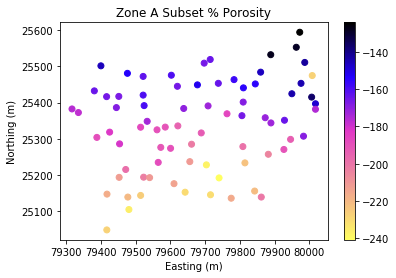

In [210]:
plt.scatter( P[:,0], P[:,1], c=P[:,2], cmap=geoplot.YPcmap )
plt.title('Zone A Subset % Porosity')
plt.colorbar()
# xmin, xmax = 0, 4250
# ymin, ymax = 3200, 6250
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# for i in range( len( P[:,2] ) ):
#     x, y, por = P[i]
#     if( x < xmax )&( y > ymin )&( y < ymax ):
#         plt.text( x+100, y, '{:4.2f}'.format( por ) ) 
# # plt.scatter( pt[0], pt[1], marker='x', c='k' )
# # plt.text( pt[0]+100 , pt[1], '?')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)') ;

D:\adiarun\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\adiarun\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


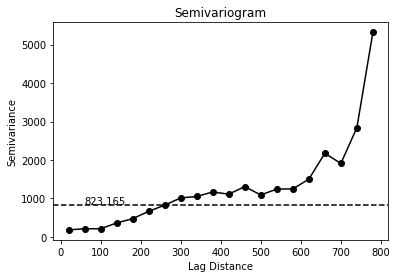

In [217]:
tolerance = 20
lags = np.arange( tolerance, 1000, tolerance*2 )
sill = np.var( P[:,2] )
geoplot.semivariogram( P, lags, tolerance )

D:\adiarun\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\adiarun\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


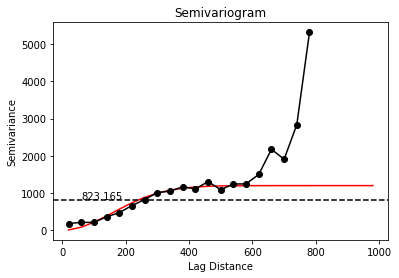

In [226]:
sill=1200
arange=390
svm = model.semivariance( model.gaussian, ( arange, sill ) )
geoplot.semivariogram( P, lags, tolerance, model=svm )

In [232]:
covfct = model.covariance( model.gaussian, ( arange, sill ) )

In [ ]:
# x=P[0]
# y=P[1]
# xi = np.linspace(min(x),max(x),100)
# yi = np.linspace(min(y),max(y),100)
# # grid the data.
# # zi = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='cubic')
# # zi[zi<0]=0
# # contour the gridded data, plotting dots at the randomly spaced data points.
# CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
# CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
# plt.colorbar() # draw colorbar
# # plot data points.
# plt.scatter(x,y,marker='o',c='b',s=5)

In [245]:
X0, X1 = P[:,0].min(), P[:,0].max()
Y0, Y1 = P[:,1].min(), P[:,1].max()
Z = np.zeros((80,100))
dx, dy = (X1-X0)/100.0, (Y1-Y0)/80.0
for i in range( 80 ):
    print (i,end=',')
    for j in range( 100 ):
#         Z[i,j] = kriging.krige( P, model, (dy*j,dx*i), 16 )
        Z[i,j]=kriging.simple( P, covfct,(X0+dx*j,Y0+dy*i), N=16)[0]

0,1,2,3,4,5,

../geostatsmodels\geostatsmodels\kriging.py:81: RuntimeWarning: invalid value encountered in sqrt
  kstd = np.sqrt( kvar )


6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,

In [243]:
# kriging.simple( P, covfct,(dy*j,dx*i), N=6 )
Z

array([[-198.31859227, -199.30199701, -200.41467065, ...,  -66.96832667,
         -66.3058928 ,  -66.01265148],
       [-200.01266404, -200.85925952, -201.82264812, ...,  -68.80388813,
         -67.96422395,  -67.50483496],
       [-201.79667514, -202.50338354, -203.31373238, ...,  -70.88976322,
         -69.87667794,  -69.50961766],
       ..., 
       [-138.69518489, -137.8186985 , -143.65529935, ..., -103.51840549,
         -98.74916091,  -94.75076746],
       [-138.08200412, -144.5197724 , -142.90722663, ...,  -98.09605894,
         -91.81108742,  -86.31490765],
       [-137.58646067, -143.87146322, -142.26385467, ...,  -92.70702983,
         -84.98224632,  -78.06252118]])

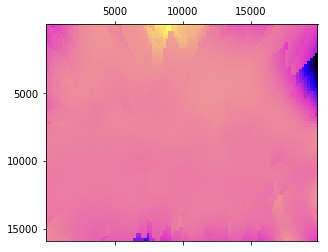

In [251]:
import matplotlib
cdict = {'red':   ((0.0, 1.0, 1.0),
                   (0.5, 225/255., 225/255. ),
                   (0.75, 0.141, 0.141 ),
                   (1.0, 0.0, 0.0)),
         'green': ((0.0, 1.0, 1.0),
                   (0.5, 57/255., 57/255. ),
                   (0.75, 0.0, 0.0 ),
                   (1.0, 0.0, 0.0)),
         'blue':  ((0.0, 0.376, 0.376),
                   (0.5, 198/255., 198/255. ),
                   (0.75, 1.0, 1.0 ),
                   (1.0, 0.0, 0.0)) }
 
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
 
fig, ax = plt.subplots()
H = np.zeros_like( Z )
for i in range( Z.shape[0] ):
    for j in range( Z.shape[1] ):
        H[i,j] = np.round( Z[i,j] )
        
ax.matshow( H, cmap=my_cmap, interpolation='nearest' )
# ax.scatter( z.x/200.0, z.y/200.0, facecolor='none', linewidths=0.75, s=50 )
# xlim(0,99) ; ylim(0,80)
plt.xticks( [25,50,75], [5000,10000,15000] )
plt.yticks( [25,50,75], [5000,10000,15000] )
 
fig.savefig( 'krigingpurple.png', fmt='png', dpi=200 )

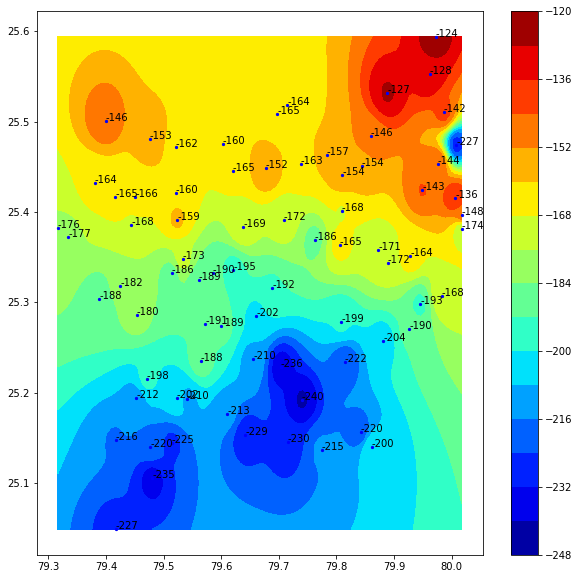

In [332]:
def iwd(x,y,v,gridsize=(100,100),power=2):
    xi = np.linspace(min(x),max(x),gridsize[0])
    yi = np.linspace(min(y),max(y),gridsize[1])
    grid = np.zeros((len(xi),len(yi)))
    for ix,i in enumerate(xi):
        for jy,j in enumerate(yi):
            distance = np.sqrt((x-i)**2+(y-j)**2)
            if (distance**power).min()==0: 
                grid[ix,jy] = v[(distance**power).argmin()]
            else:
                total = np.sum(1/(distance**power))
                grid[ix,jy] = np.sum(v/(distance**power)/total)
    return grid.T

def iwd_point(x,y,v,xy,power=2):
    distance = np.sqrt((x-xy[0])**2+(y-xy[1])**2)
    if (distance**power).min()==0: 
        est = v[(distance**power).argmin()]
    else:
        total = np.sum(1/(distance**power))
        est = np.sum(v/(distance**power)/total)
    return est
def calc_plot_grid(P,gridsize=(100,100),method='kriging'):    
    xi = np.linspace(min(P[:,0]),max(P[:,0]),gridsize[0])
    yi = np.linspace(min(P[:,1]),max(P[:,1]),gridsize[1])
    fig=plt.figure(figsize=(10,10))
    # grid the data.
    if method=='cubic':
        zi = griddata((P[:,0], P[:,1]), P[:,2], (xi[None,:], yi[:,None]), method='cubic')
    elif method=='kriging':
        zi = np.zeros((len(xi),len(yi)))
        sill=1200
        arange=390
        covfct = model.covariance( model.gaussian, ( arange, sill ) )
        for i,x in enumerate(xi):
            for j,y in enumerate(yi):
                zi[i,j]=kriging.simple( P, covfct,(x,y), N=16)[0]
    elif method=='iwd':
        zi=iwd(P[:,0], P[:,1], P[:,2],gridsize,power=2)
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(P[:,0], P[:,1],marker='o',c='b',s=5)
    for p in P:
        plt.annotate(str(int(p[2])),xy=(p[0],p[1]))
#     plt.show()

P=xy_final_depths[:,[0,1,2]]
calc_plot_grid(P,gridsize=(100,150),method='iwd')

In [309]:
# zi = np.zeros((len(xi),len(yi)),dtype='float32')
# iwd(P[:,0], P[:,1], P[:,2],zi,2)
# np.linspace(min(P[:,0]),max(P[:,0]),100)
gridsize=(100,100)
gridsize[0]

100

In [333]:
# calc_plot_grid(P,method='kriging'),
# P=xy_final_depths[:,[0,1,2]]
# for i in range(2,len(xy_final_depths[0,:])):
#     P=xy_final_depths[:,[0,1,i]]
#     calc_plot_grid(P,method='iwd')

In [331]:
xycoords[:,0]

array([ 79.9767482 ,  79.97815309,  79.97955798,  79.98096287,
        79.98236776,  79.98377265,  79.98517754,  79.98658242,
        79.98798731,  79.9893922 ,  79.99079709,  79.99220198,
        79.99360687,  79.99501176,  79.99641665,  79.99782154,
        79.99922643,  80.00063132,  80.00203621,  80.0034411 ,
        80.00484599,  80.00625088,  80.00765577,  80.00906066,
        80.00906066,  80.00765577,  80.00625088,  80.00484599,
        80.0034411 ,  80.00203621,  80.00063132,  79.99922643,
        79.99782154,  79.99641665,  79.99501176,  79.99360687,
        79.99220198,  79.99079709,  79.9893922 ,  79.98798731,
        79.98658242,  79.98517754,  79.98377265,  79.98236776,
        79.98096287,  79.97955798,  79.97815309,  79.9767482 ])

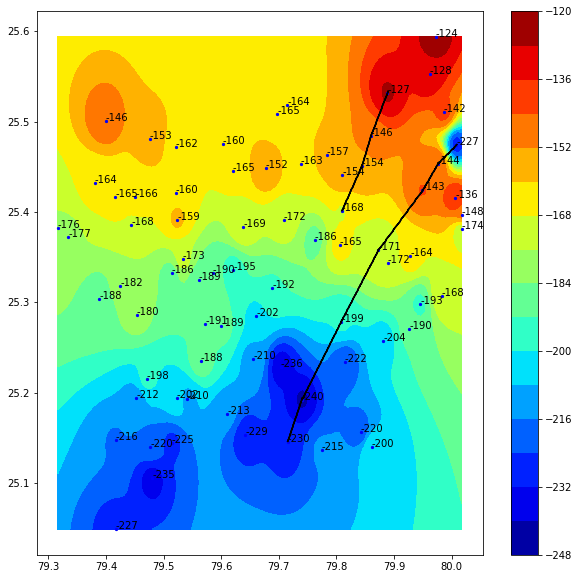

In [336]:
calc_plot_grid(P,method='iwd')
for polyset in polysets:
    for section in polyset:
        xycoords=section[0]        
        plt.plot(xycoords[:,0],xycoords[:,1],'k')
#         break


In [343]:
for xy in xycoords:
#     print(xy)
    zval.append(iwd_point(P[:,0], P[:,1], P[:,2],xy[:2],power=2))
    print(zval,end=', ')
    
xycoords

AttributeError: 'numpy.float64' object has no attribute 'append'

In [ ]:
def get_polysFromLayers_mod(elevation,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[]
    indeces=[]
    fyi=np.flipud(yi)
    fxi=np.flipud(xi)
    for xyind in xycoords[:,:]:
#         print(j,end=',')
        indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
        indeces.append([indx,indy])
        depth_on_cl.append(elevation[indy,indx][0])
    depth_on_cl=np.array([depth_on_cl])
#     print(depth_on_cl)
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        for xyind in indeces:
    #         print(j,end=',')
#             indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
            thk_on_cl.append(layers[i][xyind[1],xyind[0]][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)

    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(xycoords.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(xycoords.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))    
    return polygons,depth_on_cl

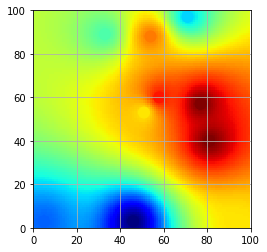

In [284]:
# from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt

def iwd(x,y,v,grid,power):
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            distance = np.sqrt((x-i)**2+(y-j)**2)
            if (distance**power).min()==0: 
                grid[i,j] = v[(distance**power).argmin()]
            else:
                total = np.sum(1/(distance**power))
                grid[i,j] = np.sum(v/(distance**power)/total)
    return grid



np.random.seed(123433789) # GIVING A SEED NUMBER FOR THE EXPERIENCE TO BE REPRODUCIBLE
grid = np.zeros((100,100),dtype='float32') # float32 gives us a lot precision
x,y = np.random.randint(0,100,10),np.random.randint(0,100,10) # CREATE POINT SET.
v = np.random.randint(0,10,10) # THIS IS MY VARIABLE

grid = iwd(x,y,v,grid,2)
plt.imshow(grid.T,origin='lower',interpolation='nearest',cmap='jet')
plt.scatter(x,y,c=v,cmap='jet',s=120)
plt.xlim(0,grid.shape[0])
plt.ylim(0,grid.shape[1])
plt.grid()
plt.show()